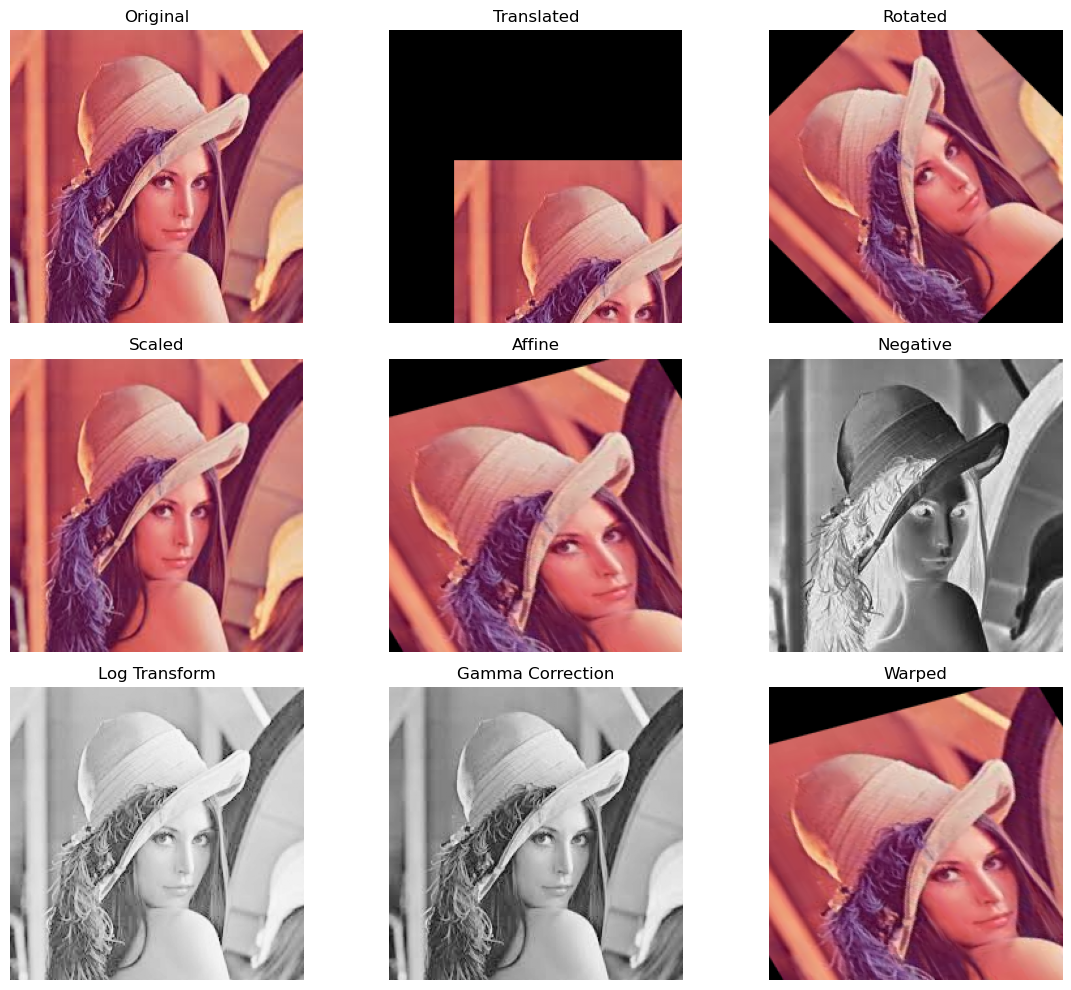

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread("lena.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------- Translation ----------------
rows, cols = img.shape[:2]
M_translate = np.float32([[1, 0, 50], [0, 1, 100]])  # shift x by 50, y by 100
translated = cv2.warpAffine(img, M_translate, (cols, rows))

# ---------------- Rotation ----------------
M_rotate = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # rotate 45 degrees
rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

# ---------------- Scaling ----------------
scaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# ---------------- Affine Transformation ----------------
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M_affine, (cols, rows))

# ---------------- Image Negative ----------------
negative = 255 - img_gray

# ---------------- Logarithmic Transformation ----------------
c = 255 / np.log(1 + np.max(img_gray))
log_transformed = c * (np.log(1 + img_gray.astype(np.float32)))
log_transformed = np.array(log_transformed, dtype=np.uint8)

# ---------------- Power Law (Gamma) Transformation ----------------
gamma = 0.5  # try 0.4, 0.6, 2.0 for different results
gamma_corrected = np.array(255 * (img_gray / 255) ** gamma, dtype=np.uint8)

# ---------------- Warping with Transformation Matrix ----------------
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_warp = cv2.getAffineTransform(pts1, pts2)
warped = cv2.warpAffine(img, M_warp, (cols, rows))

# ---------------- Display Results ----------------
titles = ["Original", "Translated", "Rotated", "Scaled",
          "Affine", "Negative", "Log Transform", "Gamma Correction", "Warped"]
images = [img, translated, rotated, scaled,
          affine, negative, log_transformed, gamma_corrected, warped]

plt.figure(figsize=(12, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    if len(images[i].shape) == 2:  # grayscale
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
